### TEAM ZM5

# EDSA MOVIE RECOMMENDATION CHALLENGE 

### Installing packages
Please download all relevant packages in. There is no terminal so you will need to pip install everything.

In [2]:
!wget 'https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/27685/2229266/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626387714&Signature=KygcspWYq74MDW0sfdmsG%2BKzbIVu7bAXbXSgGzeRSkW1y50gc6YBYMtbWZMOlxFxGTB4M8pHrDatrNrM7K1O7uBHHp6x1h3QEEHSnSa1X4tTYBy%2BiExhUNlV5Ez1E9Df5zYELJM1iOOtpnqWBcsndQN3mGXbpPgN4a9DBmihapuzgRXhixTX8Y3qyY9KJkoi99azSOVvQEj4S57R2KpqKOozaJUNNLSuV9z6KOoE0qzUq3%2FA5vvKE7uN7sG%2B5mmkmqAShUwzuurKBMGlty0%2FCCs8Yalhbfbto2PI4Yr%2BZJgpjxueDILjj1n1zcfeAQ083InWmYWZdd3Jbgyp4fIy0w%3D%3D&response-content-disposition=attachment%3B+filename%3Dedsa-movie-recommendation-challenge.zip'

The name is too long, 541 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626387714&Signature=KygcspWYq74MDW0sfdmsG+KzbIVu7bAXbXSgGzeRSkW1y50gc6YBYMtbWZMOlxFxGTB4M8pHrDatrNrM7K1O7uBHHp6x1h3QEEHSnSa1X4tTYBy+iExhUNlV5Ez1E9Df5zYEL.
--2021-07-12 22:22:40--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/27685/2229266/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626387714&Signature=KygcspWYq74MDW0sfdmsG%2BKzbIVu7bAXbXSgGzeRSkW1y50gc6YBYMtbWZMOlxFxGTB4M8pHrDatrNrM7K1O7uBHHp6x1h3QEEHSnSa1X4tTYBy%2BiExhUNlV5Ez1E9Df5zYELJM1iOOtpnqWBcsndQN3mGXbpPgN4a9DBmihapuzgRXhixTX8Y3qyY9KJkoi99azSOVvQEj4S57R2KpqKOozaJUNNLSuV9z6KOoE0qzUq3%2FA5vvKE7uN7sG%2B5mmkmqAShUwzuurKBMGlty0%2FCCs8Yalhbfbto2PI4Yr%2BZJgpjxueDILjj1n1zcfeAQ083InWmYWZdd3Jbgyp4fIy0w%3D%3D&response-content-disposition=attachment%3B+filename%3Dedsa-movie-recommendation-challenge.zip
Resolving storage.go

In [3]:
!unzip 'archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626387714&Signature=KygcspWYq74MDW0sfdmsG+KzbIVu7bAXbXSgGzeRSkW1y50gc6YBYMtbWZMOlxFxGTB4M8pHrDatrNrM7K1O7uBHHp6x1h3QEEHSnSa1X4tTYBy+iExhUNlV5Ez1E9Df5zYEL'

Archive:  archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626387714&Signature=KygcspWYq74MDW0sfdmsG+KzbIVu7bAXbXSgGzeRSkW1y50gc6YBYMtbWZMOlxFxGTB4M8pHrDatrNrM7K1O7uBHHp6x1h3QEEHSnSa1X4tTYBy+iExhUNlV5Ez1E9Df5zYEL
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: imdb_data.csv           
  inflating: links.csv               
  inflating: movies.csv              
  inflating: sample_submission.csv   
  inflating: tags.csv                
  inflating: test.csv                
  inflating: train.csv               


In [9]:
!pip install LibRecommender
!pip install surprise
!pip install comet_ml
!pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 286kB 17.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


### Imports

In [5]:
import comet_ml

In [6]:
# First import comet_ml at the top of your file
from comet_ml import Experiment

In [7]:
# Create an experiment with your api key for version control
experiment = Experiment(
    api_key="amGQj1TC3Wyk9LYf7bD9xNV6G",
    project_name="movie-reccomender-edsa",
    workspace="daniel-bru",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/daniel-bru/movie-reccomender-edsa/12d4d0d6a33946d18a94b59fb08b12ba



In [10]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

from libreco.data import random_split, DatasetPure, DataInfo
from libreco.data import split_by_ratio_chrono, DatasetFeat
from libreco.algorithms import SVD as libSVD
from libreco.algorithms import SVDpp
from libreco.algorithms import FM, WideDeep, DeepFM, AutoInt, DIN
from libreco.evaluation import evaluate
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["KMP_WARNINGS"] = "FALSE"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
def reset_state(name):
    tf.compat.v1.reset_default_graph()
    print("\n", "=" * 30, name, "=" * 30)

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time
from time import sleep
import gc

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

Instructions for updating:
non-resource variables are not supported in the long term


### Reading in data

In [11]:
root_path = ''
df_sample_submission = pd.read_csv(root_path + 'sample_submission.csv')
df_movies = pd.read_csv(root_path + 'movies.csv')
df_imdb = pd.read_csv(root_path + 'imdb_data.csv')
df_genome_scores = pd.read_csv(root_path + 'genome_scores.csv')
df_genome_tags = pd.read_csv(root_path +'genome_tags.csv')
train = pd.read_csv(root_path + 'train.csv')
df_test = pd.read_csv(root_path + 'test.csv')
df_tags = pd.read_csv(root_path + 'tags.csv')
df_links = pd.read_csv(root_path + 'links.csv')

In [12]:
pd.set_option("display.max.column", None)
print(df_sample_submission.info())
df_sample_submission.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
Id        object
rating    float64
dtypes: float64(1), object(1)
memory usage: 76.3+ MB
None


,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [13]:
print(df_movies.info())
df_movies.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
movieId    62423 non-null int64
title      62423 non-null object
genres     62423 non-null object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
print(df_imdb.info())
df_imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
movieId          27278 non-null int64
title_cast       17210 non-null object
director         17404 non-null object
runtime          15189 non-null float64
budget           7906 non-null object
plot_keywords    16200 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [15]:
print(df_genome_scores.info())
df_genome_scores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
movieId      int64
tagId        int64
relevance    float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [16]:
print(df_genome_tags.info())
df_genome_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
tagId    1128 non-null int64
tag      1128 non-null object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [17]:
print(df_tags.info())
df_tags.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
userId       1093360 non-null int64
movieId      1093360 non-null int64
tag          1093344 non-null object
timestamp    1093360 non-null int64
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
None


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [18]:
print(df_links.info())
df_links.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
movieId    62423 non-null int64
imdbId     62423 non-null int64
tmdbId     62316 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [19]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
None


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [20]:
print(df_test.info())
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
userId     int64
movieId    int64
dtypes: int64(2)
memory usage: 76.3 MB
None


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


# Exploratory Data Analysis

**Most common Genres**

In [21]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


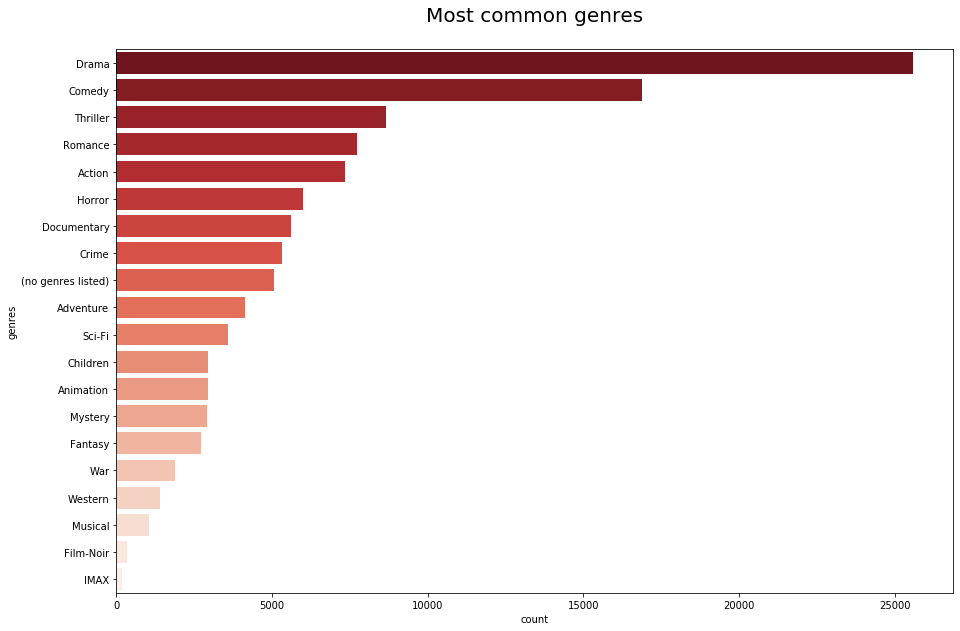

In [22]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

**Most common actors**

In [23]:
# Create dataframe containing only the movieId and cast members
cast = pd.DataFrame(df_imdb[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the cast members in each movie
cast.title_cast = cast.title_cast.astype(str).apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie - cast member combination is in a seperate row
cast = pd.DataFrame([(tup.movieId, d) for tup in cast.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])

mostc_cast = cast['title_cast'].value_counts(ascending=False).index.tolist()[:50]

print('Total Cast Members:', len(list(cast['title_cast'].unique())))
print('Most Common Cast Members:\n', mostc_cast)
display(cast.head())

Total Cast Members: 121036
Most Common Cast Members:
 ['nan', 'Samuel L. Jackson', 'Steve Buscemi', 'Keith David', 'Willem Dafoe', 'Robert De Niro', 'Brian Cox', 'Gérard Depardieu', 'Christopher Walken', 'Bruce Willis', 'Morgan Freeman', 'Danny Glover', 'Alec Baldwin', 'Peter Stormare', 'Nicolas Cage', 'Stanley Tucci', 'Richard Jenkins', 'Susan Sarandon', 'Julianne Moore', 'Woody Harrelson', 'John Goodman', 'Stellan Skarsgård', 'Tom Wilkinson', 'Val Kilmer', 'Antonio Banderas', 'Christopher McDonald', 'Jeff Bennett', 'Johnny Depp', 'Ed Harris', 'John Leguizamo', 'Forest Whitaker', 'Ray Liotta', 'Donald Sutherland', 'Harvey Keitel', 'John Cusack', 'Luis Guzmán', 'Stephen Tobolowsky', 'Paul Giamatti', 'Danny Trejo', 'John Malkovich', 'Richard Riehle', 'George W. Bush', 'Jim Broadbent', 'David Strathairn', 'Ewan McGregor', 'Jim Cummings', 'William H. Macy', 'Robert Downey Jr.', 'Patricia Clarkson', 'Ving Rhames']


,movieId,title_cast
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn


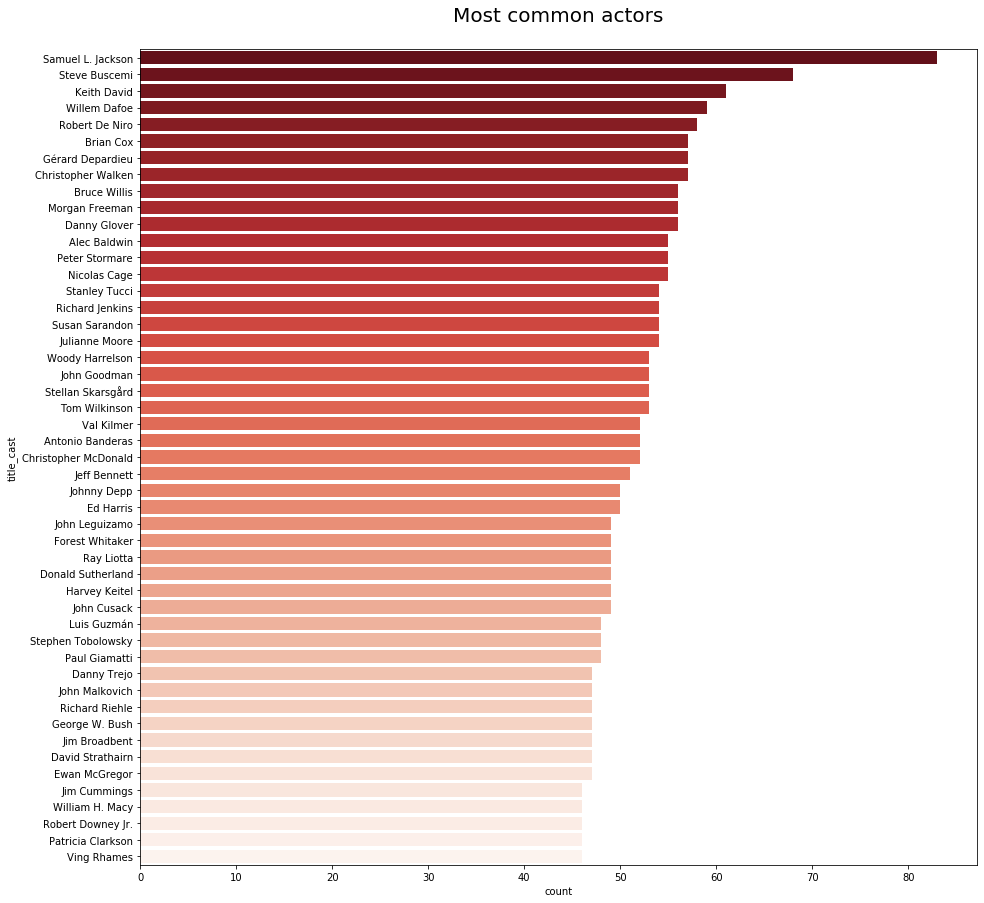

In [24]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 15))
plt.title('Most common actors\n', fontsize=20)
sns.countplot(y="title_cast", data=cast,
              order=mostc_cast[1:50],
              palette='Reds_r')
plt.show()

## Data Prepartion

In [68]:
df_train = train.copy()

rating_count = df_train.groupby('movieId')['rating'].count().reset_index()
rating_count.rename(columns = {'rating': 'movie_rating_count'}, inplace=True)
df_train = df_train.merge(rating_count, on='movieId')

user_count = df_train.groupby('userId')['rating'].count().reset_index()
user_count.rename(columns={'rating': 'user_rating_count'}, inplace=True)
df_train=df_train.merge(user_count, on='userId')

df_train = df_train[df_train['movie_rating_count'] > 20]
df_train = df_train[df_train['user_rating_count'] > 5]
display(df_train.head(3))
df_train.drop(['movie_rating_count','user_rating_count'], 1, inplace=True)
print(df_train.shape)
display(df_train.head(3))

,userId,movieId,rating,timestamp,movie_rating_count,user_rating_count
0,5163,57669,4.0,1518349992,4253,22
1,5163,2671,1.0,1545511636,5698,22
2,5163,1247,4.5,1434310106,7569,22


(9848791, 4)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,5163,2671,1.0,1545511636
2,5163,1247,4.5,1434310106


In [63]:
def create_features(df, column, features):
    """Creates features from a column of lists where the list items will be the features."""
    
    features_df = pd.DataFrame(columns = features)
    all_features = pd.concat([df, features_df], axis=1)

    for i,row in all_features.iterrows():
        for feature in features:
            if feature in getattr(row,column):
                all_features[feature].iloc[i]= 1
    all_features = all_features.drop(column, axis=1)
    
    return all_features

In [64]:
df_imdb.fillna(0, inplace=True)
df_imdb.budget = df_imdb.budget.astype(str).apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [65]:
%%time
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))
genres = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical',
       'Western', 'Film-Noir', '(no genres listed)']

genre_encode = create_features(movies_genres, 'genres', genres)
genre_encode.head(4)

CPU times: user 3min 52s, sys: 1.51 s, total: 3min 53s
Wall time: 3min 51s


,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed)
0,1,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,1,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
%%time
cast = pd.DataFrame(df_imdb[['movieId', 'title_cast']],
                             columns=['movieId', 'title_cast'])

# Split title_cast seperated by "|" and create a list containing the cast members in each movie
cast.title_cast = cast.title_cast.astype(str).apply(lambda x: x.split('|'))
cast_movie = pd.DataFrame([(tup.movieId, d) for tup in cast.itertuples() for d in tup.title_cast],
                             columns=['movieId', 'title_cast'])
mostc_cast = cast_movie['title_cast'].value_counts(ascending=False).index.tolist()[:21]

cast_encode = create_features(cast, 'title_cast', mostc_cast[1:])
cast_encode.head(4)

CPU times: user 16 s, sys: 2.98 ms, total: 16 s
Wall time: 16 s


,movieId,Samuel L. Jackson,Steve Buscemi,Keith David,Willem Dafoe,Robert De Niro,Gérard Depardieu,Brian Cox,Christopher Walken,Danny Glover,Bruce Willis,Morgan Freeman,Alec Baldwin,Nicolas Cage,Peter Stormare,Susan Sarandon,Julianne Moore,Stanley Tucci,Richard Jenkins,John Goodman,Stellan Skarsgård
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
gc.collect()
del rating_count, user_count, movies_genres, cast, cast_movie
sleep(2)

## Modelling 



### Collaborative Filtering 

In [33]:
%%time
ratings = df_train.copy()
ratings_dict = {'itemID': list(ratings.movieId),
                'userID': list(ratings.userId),
                'rating': list(ratings.rating)}
df = pd.DataFrame(ratings_dict)

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0.5, 5.0))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

CPU times: user 19.4 s, sys: 2.63 s, total: 22 s
Wall time: 21.9 s


In [34]:
%%time
trainset, testset = train_test_split(data, test_size=.01, random_state = 1)

CPU times: user 34.9 s, sys: 1.16 s, total: 36.1 s
Wall time: 36 s


In [35]:
gc.collect()
del ratings, ratings_dict, df, data
sleep(10)

#### SVD      (surprise Package)

In [36]:
%%time
algo = SVD(verbose=True)
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Compute RMSE
accuracy.rmse(predictions)
accuracy.mae(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 0.8182
MAE:  0.6200
CPU times: user 11min 21s, sys: 439 ms, total: 11min 21s
Wall time: 11min 21s


0.6200475090398871

In [37]:
gc.collect()
del algo
sleep(10)

In [38]:
%%time
algo = SVD(random_state = 1, n_epochs= 16, verbose=True, n_factors =220, lr_all = 0.016, reg_all =0.02, 
           init_std_dev = 0.005, init_mean = -0.037)
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Compute RMSE
accuracy.rmse(predictions) # rmse: 0.8101      5min 29s
accuracy.mae(predictions)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
RMSE: 0.8028
MAE:  0.6050
CPU times: user 16min 5s, sys: 882 ms, total: 16min 6s
Wall time: 16min 5s


0.6050337130095826

In [39]:
gc.collect()
del algo, trainset, testset, 
sleep(10)

In [ ]:
#trainset = data.build_full_trainset()
#algo = SVD(random_state = 1, n_epochs= 16, verbose=True, n_factors =220, lr_all = 0.016, reg_all =0.02, init_std_dev = 0.005, init_mean = -0.037)
#algo.fit(trainset)

#### SVD (LibRecommender package)

In [70]:
%%time
data = df_train.copy()
data.rename(columns={'userId':'user', 'movieId':'item','rating':'label', 
                               'timestamp':'time'}, inplace=True)

# split whole data into three folds for training, evaluating and testing
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.99, 0.005, 0.005])

train_data, data_info = DatasetPure.build_trainset(train_data)
eval_data = DatasetPure.build_evalset(eval_data)
test_data = DatasetPure.build_testset(test_data)
print(data_info)

n_users: 160834, n_items: 13036, data sparsity: 0.4650 %
CPU times: user 29.4 s, sys: 2.13 s, total: 31.6 s
Wall time: 31.5 s


In [71]:
def reset_state(name):
    tf.compat.v1.reset_default_graph()
    print("\n", "=" * 30, name, "=" * 30)

In [42]:
%%time
reset_state('libSVD')
svd_lib = libSVD(task="rating", data_info=data_info, embed_size=8, n_epochs=3, lr=0.005,batch_size=10000, 
                 batch_sampling=True)  # embed_size=8, n_epochs=3, lr=0.005,batch_size=10000
# monitor metrics on eval_data during training
svd_lib.fit(train_data, verbose=2, eval_data=eval_data, metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=svd_lib, data=test_data,
                                    metrics=["rmse", "mae"]))


 ============================== libSVD ==============================
Training start time: 2021-07-12 23:02:59


train: 100%|██████████| 976/976 [00:06<00:00, 142.53it/s]


Epoch 1 elapsed: 11.867s
	 train_loss: 0.7915


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 512.04it/s]


	 eval rmse: 0.8337
	 eval mae: 0.6342
	 eval r2: 0.3812


train: 100%|██████████| 976/976 [00:06<00:00, 144.41it/s]


Epoch 2 elapsed: 11.700s
	 train_loss: 0.6425


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 500.05it/s]


	 eval rmse: 0.8182
	 eval mae: 0.6217
	 eval r2: 0.4040


train: 100%|██████████| 976/976 [00:06<00:00, 145.11it/s]


Epoch 3 elapsed: 11.782s
	 train_loss: 0.5945


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 480.92it/s]


	 eval rmse: 0.8162
	 eval mae: 0.6198
	 eval r2: 0.4069


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 464.05it/s]


evaluate_result:  {'rmse': 0.8137771024383709, 'mae': 0.616514382066739}
CPU times: user 1min 45s, sys: 6.32 s, total: 1min 51s
Wall time: 37 s


In [43]:
print("prediction: ", svd_lib.predict(user=5163, item=57669))
print("recommendation: ", svd_lib.recommend_user(user=5163, n_rec=5))
svd_lib.predict(df_train['userId'][:10], df_train['movieId'][:10])

prediction:  [4.356262]
recommendation:  [(86345, 5.0126114), (143511, 5.0124683), (296, 4.9253125), (160289, 4.9095993), (118888, 4.8955703)]


array([4.356262 , 3.0760856, 4.447539 , 4.4829307, 3.5870876, 4.294245 ,
       3.9488153, 4.017835 , 4.463873 , 3.815593 ], dtype=float32)

In [44]:
gc.collect()
del data, svd_lib
sleep(10)

SVDpp from Librecommender

In [72]:
%%time
reset_state('SVDpp')
svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, lr=0.005,batch_size=10000,
              batch_sampling=True)  # embed_size=16, n_epochs=2, lr=0.005,batch_size=10000
# monitor metrics on eval_data during training
svdpp.fit(train_data, verbose=2, eval_data=eval_data, metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=svdpp, data=test_data,
                                    metrics=["rmse", "mae"]))


 ============================== SVDpp ==============================
Training start time: 2021-07-13 00:37:42


train: 100%|██████████| 976/976 [15:35<00:00,  1.04it/s]


Epoch 1 elapsed: 941.896s
	 train_loss: 0.7369


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 414.35it/s]


	 eval rmse: 0.8118
	 eval mae: 0.6175
	 eval r2: 0.4133


train: 100%|██████████| 976/976 [15:41<00:00,  1.04it/s]


Epoch 2 elapsed: 947.863s
	 train_loss: 0.5991


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 439.98it/s]


	 eval rmse: 0.8002
	 eval mae: 0.6077
	 eval r2: 0.4299


train: 100%|██████████| 976/976 [15:36<00:00,  1.04it/s]


Epoch 3 elapsed: 943.085s
	 train_loss: 0.5405


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 473.76it/s]


	 eval rmse: 0.8044
	 eval mae: 0.6100
	 eval r2: 0.4240


eval_pred: 100%|██████████| 7/7 [00:00<00:00, 470.79it/s]

evaluate_result:  {'rmse': 0.7995931212640899, 'mae': 0.6051560321468874}
CPU times: user 1h 2min 3s, sys: 13min 56s, total: 1h 16min
Wall time: 47min 24s


In [46]:
print("prediction: ", svdpp.predict(user=5163, item=57669))
print("recommendation: ", svdpp.recommend_user(user=5163, n_rec=5))
svdpp.predict(df_train['userId'][:10], df_train['movieId'][:10])

prediction:  [4.2640405]
recommendation:  [(141826, 4.854715), (127098, 4.8520575), (1196, 4.802204), (296, 4.7998724), (86345, 4.78571)]


array([4.2640405, 2.957478 , 4.092132 , 4.558829 , 3.354058 , 4.2632527,
       4.021072 , 3.9542356, 4.283123 , 4.5577803], dtype=float32)

In [73]:
gc.collect()
del svdpp, train_data, data_info, eval_data, test_data
sleep(10)

Train SVDpp on full dataset

In [ ]:
# data = pd.read_csv(root_path + 'train.csv', header=0, names = ["user", "item", "label", "time"])
# train_data, data_info = DatasetPure.build_trainset(data)

# reset_state('SVDpp')
# svdpp = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, lr=0.005,batch_size=10000, batch_sampling=True)
# svdpp.fit(train_data, verbose=2)

Save SVDpp model

In [ ]:
"""
data_info.save(path="SVDpp_model_path")
svdpp.save(path="SVDpp_model_path", model_name="svdpp_model", manual=True,
                inference_only=False)
"""

In [ ]:
"""
tf.compat.v1.reset_default_graph()
data_info = DataInfo.load("SVDpp_model_path")

svdpp_loaded = SVDpp(task="rating", data_info=data_info, embed_size=16, n_epochs=2, 
                                                lr=0.005,batch_size=10000, batch_sampling=True)

data = pd.read_csv(root_path + 'train.csv', header=0, names = ["user", "item", "label", "time"])
train_data, eval_data, test_data = random_split(data, multi_ratios=[0.99, 0.005, 0.005])
train_data, data_info = DatasetPure.build_trainset(train_data)
svdpp_loaded.rebuild_graph(path="SVDpp_model_path", model_name="svdpp_model",
                        full_assign=True, train_data=train_data)
"""

In [ ]:
#svdpp_loaded.predict(df_train['userId'][:10], df_train['movieId'][:10])

### Hybrid Models

In [74]:
%%time
mergeded_train = df_train.copy()
mergeded_train = pd.merge(mergeded_train, genre_encode,on= 'movieId', how='left')
mergeded_train = pd.merge(mergeded_train, cast_encode, on= 'movieId', how='left')
print(mergeded_train.shape)

(9848791, 44)
CPU times: user 10.7 s, sys: 4.37 s, total: 15 s
Wall time: 14.9 s


In [75]:
gc.collect()
del genre_encode, cast_encode
sleep(10)

In [76]:
%%time
mergeded_train = pd.merge(mergeded_train, df_imdb[['movieId', 'runtime', 
                                                   'budget']], on= 'movieId').fillna(0)
mergeded_train.head()

CPU times: user 2min 26s, sys: 23.8 s, total: 2min 50s
Wall time: 2min 47s


,userId,movieId,rating,timestamp,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,Documentary,War,Musical,Western,Film-Noir,(no genres listed),Samuel L. Jackson,Steve Buscemi,Keith David,Willem Dafoe,Robert De Niro,Gérard Depardieu,Brian Cox,Christopher Walken,Danny Glover,Bruce Willis,Morgan Freeman,Alec Baldwin,Nicolas Cage,Peter Stormare,Susan Sarandon,Julianne Moore,Stanley Tucci,Richard Jenkins,John Goodman,Stellan Skarsgård,runtime,budget
0,5163,57669,4.0,1518349992,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107.0,15000000
1,87388,57669,3.5,1237455297,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107.0,15000000
2,137050,57669,4.0,1425631854,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107.0,15000000
3,120490,57669,4.5,1408228517,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107.0,15000000
4,50616,57669,4.5,1446941640,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107.0,15000000


In [77]:
columns = list(mergeded_train.columns)
print(columns[4:])

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)', 'Samuel L. Jackson', 'Steve Buscemi', 'Keith David', 'Willem Dafoe', 'Robert De Niro', 'Gérard Depardieu', 'Brian Cox', 'Christopher Walken', 'Danny Glover', 'Bruce Willis', 'Morgan Freeman', 'Alec Baldwin', 'Nicolas Cage', 'Peter Stormare', 'Susan Sarandon', 'Julianne Moore', 'Stanley Tucci', 'Richard Jenkins', 'John Goodman', 'Stellan Skarsgård', 'runtime', 'budget']


In [ ]:
mergeded_train.to_csv('train_feat.csv', index=False)

In [ ]:
from IPython.display import FileLink
FileLink('./train_feat.csv')

In [78]:
%%time
#mergeded_train = pd.read_csv('./train_feat.csv')
mergeded_train.rename(columns={'userId':'user', 'movieId':'item','rating':'label', 
                               'timestamp':'time'}, inplace=True)

columns = list(mergeded_train.columns)
sparse_col = columns[4:]
item_col = columns[4:]

# split whole data into three folds for training, evaluating and testing
train_data, eval_data, test_data = random_split(
    mergeded_train, multi_ratios=[0.99, 0.005, 0.005])

train_data, data_info = DatasetFeat.build_trainset(train_data, item_col=item_col,
                                                   sparse_col=sparse_col)
eval_data = DatasetFeat.build_evalset(eval_data)
test_data = DatasetFeat.build_testset(test_data)
print(data_info)

n_users: 160815, n_items: 11637, data sparsity: 0.5052 %
CPU times: user 1min 18s, sys: 14 s, total: 1min 32s
Wall time: 1min 31s


In [54]:
gc.collect()
del mergeded_train, columns, sparse_col, item_col
sleep(10)

In [ ]:
%%time
reset_state("FM")
fm = FM("rating", data_info, embed_size=8, n_epochs=2,
            lr=0.01, lr_decay=False, reg=None, batch_size=2000,
            num_neg=1, use_bn=True, dropout_rate=None, tf_sess_config=None)
fm.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
           metrics=["rmse", "mae", "r2"])

# do final evaluation on test data
print("evaluate_result: ", evaluate(model=fm, data=test_data,
                                    metrics=["rmse", "mae"]))


 ============================== FM ==============================
Training start time: 2021-07-13 01:39:56
total params: 1,559,392 | embedding params: 1,559,324 | network params: 68


train: 100%|██████████| 4727/4727 [00:44<00:00, 106.62it/s]


Epoch 1 elapsed: 58.294s
	 train_loss: 0.791


eval_pred: 100%|██████████| 6/6 [00:00<00:00, 79.57it/s]


	 eval rmse: 0.8421
	 eval mae: 0.6397
	 eval r2: 0.3658


In [ ]:
gc.collect()
del fm
sleep(10)

In [ ]:
%%time
reset_state("Wide_Deep")
wd = WideDeep("rating", data_info, embed_size=16, n_epochs=2,
              lr={"wide": 0.01, "deep": 1e-4}, lr_decay=False, reg=None,
              batch_size=100000, num_neg=1, use_bn=False, dropout_rate=None,
              hidden_units="128,64,32", tf_sess_config=None)
wd.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
       metrics=["rmse", "mae", "r2"])
# do final evaluation on test data
print("evaluate_result: ", evaluate(model=wd, data=test_data,
                                    metrics=["rmse", "mae"]))

In [ ]:
gc.collect()
del wd
sleep(10)

In [ ]:
%%time
reset_state("DeepFM")
deepfm = DeepFM("rating", data_info, embed_size=512, n_epochs=3,
                lr=5e-3, lr_decay=True, reg=None, batch_size=2048,
                num_neg=1, use_bn=False, dropout_rate=None,
                hidden_units="128,64,32,16,8,4", tf_sess_config=None)
deepfm.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
           metrics=["rmse", "mae", "r2"])

print("evaluate_result: ", evaluate(model=deepfm, data=test_data,
                                    metrics=["rmse", "mae"]))

In [ ]:
gc.collect()
del deepfm
sleep(10)

In [ ]:
%%time
reset_state("AutoInt")
autoint = AutoInt("rating", data_info, embed_size=16, n_epochs=2,
                  att_embed_size=(8, 8, 8), num_heads=4, use_residual=False,
                  lr=1e-3, lr_decay=False, reg=None, batch_size=2048,
                  num_neg=1, use_bn=False, dropout_rate=None,
                  hidden_units="128,64,32", tf_sess_config=None)
autoint.fit(train_data, verbose=2, shuffle=True, eval_data=eval_data,
            metrics=["rmse", "mae", "r2"])

In [ ]:
gc.collect()
del autoint
sleep(10)


### Create Submission
Hit the blue Publish button at the top of your notebook screen. It will take some time for your kernel to run. When it has finished your navigation bar at the top of the screen will have a tab for Output. This only shows up if you have written an output file (like we did in the Prepare Submission File step).

In [ ]:
"""
# Pickle The Model
model_save_path = "SVD_tunedA1.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(algo,file)
"""

In [ ]:
"""
model_load_path = "/content/drive/MyDrive/Unsupervised Models/SVD_tunedA1.pkl"
with open(model_load_path,'rb') as file:
    algo = pickle.load(file)
"""

In [ ]:
def create_submission(algo, save_name):
    
    ratings_predictions = [algo.predict(row.userId, row.movieId) for _,row in df_test.iterrows()]
    df_pred = pd.DataFrame(ratings_predictions)
    df_pred = df_pred.rename(columns={'uid':'userId', 'iid':'movieId','est':'rating'})
    df_pred.drop(['r_ui','details'],axis=1,inplace=True)
    # Create ID column
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv(save_name + '.csv', index=False)
    
    return pd.read_csv('./' + save_name + '.csv')

def create_librec_submission(svdpp, save_name)
    svdpp_pred = svdpp.predict(df_test['userId'], df_test['movieId'], cold_start= "popular")
    df_pred =df_test.copy()
    df_pred['rating'] = svdpp_pred
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred['Id'] = df_pred.apply(lambda x:'%s_%s' % (x['userId'],x['movieId']),axis=1)
    df_pred = df_pred[['Id', 'rating']]
    df_pred.to_csv(save_name + '.csv', index=False)
    return pd.read_csv('./' + save_name + '.csv')

In [ ]:
"""%%time
submission = create_submission(algo, 'SVD_tunedA1')
submission.head(10)"""

In [ ]:
"""%%time
librec_submission = create_librec_submission(svdpp, 'SVDpp_librecA')
librec_submission.head(10)"""

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

In [ ]:
#!wget 'https://kkb-production.jupyter-proxy.kaggle.net/k/67906852/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2IiwidHlwIjoiSldUIn0..EI35xsr87c7w1V2yD7-SDw.P1LKQiV4llJtRBVTZ6C8ZG7XZCLEuuotv8ZnngWLZaGkJnXeVRlmGzXehfIO1m9kRZVWT6Y0MlTOCLpuA9rwmXiuAqWSovowtSG2SlGQSutixactHV24vmnxUhSsda76o7PV8Si1ywiM_bH1MmAH5Yoi6X4ATCjeO2znT6Yr81sOgU3tGnpD4k_gpXuBSomIJW6M4VdWBLm1jbubY_Jx9g.8tA-L0aQQH60sptLCTJQIA/proxy/files/SVD_tunedA1.pkl'

In [ ]:
#cp "/content/train_feat.csv" "/content/drive/MyDrive/Unsupervised Models"

In [ ]:
def load_movie_titles(df):
    """Load movie titles from database records.
    Parameters
    ----------
    path_to_movies : str
        Relative or absolute path to movie database stored
        in .csv format.
    Returns
    -------
    list[str]
        Movie titles.
    """
    df = df.dropna()
    movie_list = df['title'].to_list()
    return movie_list

title_list = load_movie_titles(df_movies)
df_movies[14930:15200]
df_movies[25055:25255]
df_movies[21100:21200]